#SLDM: Warming Up Assignment


Anupam Chaturvedi 

PRN: 20060641004



In [92]:
#importing required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import shapiro
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot



# Question 1a
Consider the data given in file dat1.csv . Here y is a function of x1 and x2.
Write out the form of the linear model. What are the coefficients , rvs and
constants?

#Answer
*   Linear Model: Y = Bo + B1X1 + B2X2


*   Coefficients are: B1 & B2
*   Constant is Bo (Y intercept)


*   Independent Variables: X1 & X2

*   Dependent Variable: Y

In [93]:
#Importing Data Set
df = pd.read_csv("/content/dat1.csv - dat1.csv.csv").drop("Unnamed: 0", axis = 1)

# Question 1b
What is the correlation between x1 and x2? Create a scatterplot


          x1        x2
x1  1.000000  0.835846
x2  0.835846  1.000000


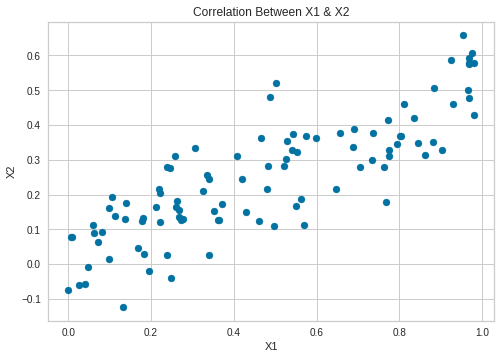

In above obtained scatter plot we can observe that there is high positive correaltion between X1 & X2


In [94]:
#Droping y column to make process simple
df_cor = df.drop("y",axis = 1)
print(df_cor.corr())

#Scatterplot
plt.scatter(df["x1"], df["x2"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Correlation Between X1 & X2")
plt.show()
print("In above obtained scatter plot we can observe that there is high positive correaltion between X1 & X2")

#Question 1b : COMMENT



*   In above obtained scatter plot we can observe that there is high positive correaltion between X1 & X2









#Question 1c
Using this data, fit a least squares regression to predict y using x1 and x2.
Describe the results obtained. Interpret ˆ β0, ˆ β1, and ˆ β2 ( these are the estimated coefficients). Test the
null hypothesis H0 : β1 = 0 and the hypothesis H0 : β2 = 0


#Model: Y = Bo + B1X1 + B2X2

In [95]:

X_all = df[["x1","x2"]]  #Independent Variables
Y = df["y"]  #Dependent Variable
X_all = sm.add_constant(X_all )  #Adding column of ones

#LSR Model
model = sm.OLS(Y,X_all).fit()
ms = model.summary()       #model summary
print(ms)


#---* Comment on Otained Output*---
#print("Comment")
#print("From Obtained Output we interpret that")
#print("Y intercept = ",model.params[0]," which is obtained when X1 & X2 in are taken 0" )
#print("B1 = ",model.params[1]," which means when X1 is increased by one unit, then predicted y increases by b1 (",model.params[1],") units")
#print("B2 = ",model.params[2]," which means when X2 is increased by one unit, then predicted y increases by b2 (",model.params[2],") units")
#print("For Ho:B1=0 - We reject null hypothesis which implie B1 is not equal to 0, so we conclude that b1 is statistically significant at significance level 0.05")
#print("For Ho:B2=0 - We do not reject null hypothesis which implie B2 is equal to 0, so we conclude that b2 is statistically insignificant at significance level 0.05")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     17.89
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           2.43e-07
Time:                        17:03:50   Log-Likelihood:                -154.28
No. Observations:                 100   AIC:                             314.6
Df Residuals:                      97   BIC:                             322.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8452      0.217      8.511      0.0



#Question (c): Comment

*   Y intercept =  1.8452180426958014  which is obtained when X1 & X2 in are taken 0
*   B1 =  1.6689217269258907  which means when X1 is increased by one unit, then predicted y increases by b1 ( 1.6689217269258907 ) units
*   B2 =  1.2385798805666774  which means when X2 is increased by one unit, then predicted y increases by b2 ( 1.2385798805666774 ) units
*   For Ho:B1=0 - We reject null hypothesis which implie B1 is not equal to 0, so we conclude that b1 is statistically significant at significance level 0.05
*   For Ho:B2=0 - We do not reject null hypothesis which implie B2 is equal to 0, so we conclude that b2 is statistically insignificant at significance level 0.05










#Question(d)
Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

#Model: Y = Bo + B1X1

In [96]:
X1 = df["x1"]  #Independent Variables
Y = df["y"]  #Dependent Variable
X1 = sm.add_constant(X1)  #Adding column of ones

#LSR Model
model_x1 = sm.OLS(Y,X1).fit()
ms_x1 = model_x1.summary()       #model summary
print(ms_x1)

#rint("Comment")
#print("From Obtained Output we interpret that")
#print("Y intercept = ",model_x1.params[0]," which is obtained when X1 & X2 in are taken 0" )
#print("B1 = ",model_x1.params[1]," which means when X1 is increased by one unit, then predicted y increases by b1 (",model_x1.params[1],") units")
#print("For Ho:B1=0 - Since pvalue = 0 which is less than 0.05 LOS, we reject null hypothesis which implie B1 is not equal to 0, so we conclude that b1 is statistically significant at significance level 0.05")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.75
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           5.32e-08
Time:                        17:03:54   Log-Likelihood:                -154.80
No. Observations:                 100   AIC:                             313.6
Df Residuals:                      98   BIC:                             318.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8748      0.215      8.726      0.0

#Question (d): Comment

*   Y intercept =  1.8747511082170756  which is obtained when X1 & X2 in are taken 0

*   B1 =  2.260307124495236  which means when X1 is increased by one unit, then predicted y increases by b1 ( 2.260307124495236 ) units
*   For Ho:B1=0 - Since pvalue =  5.31773601121059e-08 We reject null hypothesis which implie B1 is not equal to 0, so we conclude that b1 is statistically significant at significance level 0.05



#Question (e)
Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis H0 : β2 = 0?

#Model: Y = Bo + B2X2

In [97]:
X2 = df["x2"]  #Independent Variables
Y = df["y"]  #Dependent Variable
X2 = sm.add_constant(X2)  #Adding column of ones

#LSR Model
model_x2 = sm.OLS(Y,X2).fit()
ms_x2 = model_x2.summary()       #model summary
print(ms_x2)


#print("Comment")
#print("From Obtained Output we interpret that")
#print("Y intercept = ",model_x2.params[0]," which is obtained when X1 & X2 in are taken 0" )
#print("B1 = ",model_x2.params[1]," which means when X1 is increased by one unit, then predicted y increases by b1 (",model_x2.params[1],") units")
#print("For Ho:B1=0 - Since pvalue = 0 which is less than 0.05 LOS, we reject null hypothesis which implie B1 is not equal to 0, so we conclude that b1 is statistically significant at significance level 0.05")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     28.70
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           5.60e-07
Time:                        17:03:57   Log-Likelihood:                -157.14
No. Observations:                 100   AIC:                             318.3
Df Residuals:                      98   BIC:                             323.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0251      0.208      9.730      0.0

#Question (e): Comment
*   Y intercept =  2.025108521217553  which is obtained when X1 & X2 in are taken 0

*   B1 =  3.6805617498249426  which means when X1 is increased by one unit, then predicted y increases by b1 ( 3.6805617498249426 ) units
*   For Ho:B1=0 - Since pvalue = 0 which is less than 0.05 LOS, we reject null hypothesis which implie B1 is not equal to 0, so we conclude that b1 is statistically significant at significance level 0.05


#Question (f):Do the results obtained in (c)–(e) contradict each other? Explain your answer


#Answer:
 Yes, results in c and e contradict each other because

1.   In Question (c) model is Y = bo + b1X1 + b2X2, we know X1 and X2 are highly correlated, which implies presence of multicollinearity in fitted regression model, so while checking significance of model we come to conclusion that presence of one variable affects the other variable 
2.   when we consider models Y = bo + b1X1 & Y = bo + b2X2, X1 and X2 remain unaffected by presence of each other and are thus statistically significant in their respective model



#Question (g)
Measure the accuracy of your model fitted above using X1 and X2





In [98]:
#For 1st model: Y = bo + b1x1 + b2x2
print("For first model: Y = bo + b1x1 + b2x2, accuracy = ",model.rsquared_adj)
print("For second model: Y = bo + b1x1, accuracy = ",model_x1.rsquared_adj)
print("For third model: Y = bo + b2x2, accuracy = ",model_x2.rsquared_adj)

For first model: Y = bo + b1x1 + b2x2, accuracy =  0.25445289435991647
For second model: Y = bo + b1x1, accuracy =  0.254251567950907
For third model: Y = bo + b2x2, accuracy =  0.21861185413428197


0.5321196913719177
(0.9883203506469727, 0.5321196913719177)
Mean = -1.3988810110276972e-15 Variance = 1.2939241741052125


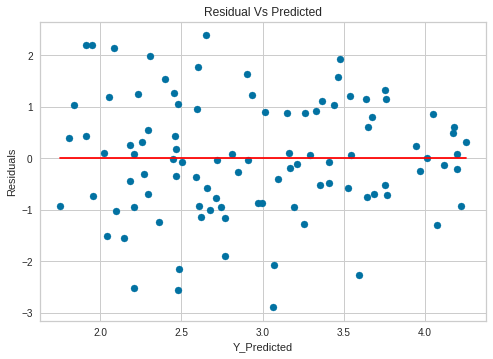

In [99]:
#Obtaining Residuals
resid = model.resid

#Checking normality of residuals using Shapiro-Wilk test
Normality= shapiro(resid)
Statistic,Pvalue = shapiro(resid)
print(Pvalue)
print(Normality)
#Mean & Variance Of residual
print("Mean =",resid.mean(),"Variance =",resid.var() )

#Checking if residuals are independent of each other
y_predicted = model.predict(X_all)
plt.scatter(y_predicted,resid)
plt.plot(np.unique(y_predicted), np.poly1d(np.polyfit(y_predicted, resid, 1))(np.unique(y_predicted)), color='red')
plt.xlabel("Y_Predicted")
plt.ylabel("Residuals")
plt.title("Residual Vs Predicted")

plt.show()

#Question g1: Comment
Property 1: We can observe that p-value = 0.53212 which is greater that 0.05 (LOS), therefore we donot reject null hypothesis and conclude that residual follow normal distribution


Property 2: residual follows normal with mean which is approx = 0 and variance is 1.29392

Property 3: Checking if errors are independent in nature using y predicted vs residual plot 
we can observe that residuals are well scattered which proves that there is no presence of autocorrelation

#Anscombe's Dataset

#Question 2a
Explore the data and obtain summary statistics for each set and
correlations between (xi, yi) i=1,2,3,4. Comment on the results




In [102]:
anscombe = pd.read_csv("/content/Anscombe.csv - Anscombe.csv.csv")

#Exploratory Data Anlaysis & Summary Statistics

In [103]:
print("---Dimension Of Anscombe's Dataset---\n ",anscombe.shape)
print("---Checking Null Values----\n",anscombe.isnull().sum())
anscombe.describe()

---Dimension Of Anscombe's Dataset---
  (11, 8)
---Checking Null Values----
 x1    0
y1    0
x2    0
y2    0
x3    0
y3    0
x4    0
y4    0
dtype: int64


,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [106]:
#Defining variables
x1,x2,x3,x4,y1,y2,y3,y4 = anscombe['x1'],anscombe['x2'],anscombe['x3'],anscombe['x4'],anscombe['y1'],anscombe['y2'],anscombe['y3'],anscombe['y4']

Correlation between x1 and y1 = 0.81642051634484
Correlation between x2 and y2 = 0.8162365060002428
Correlation between x3 and y3 = 0.8162867394895982
Correlation between x4 and y4 = 0.816521436888503


Text(0.5, 1.0, 'Correlation (Heat Map)')

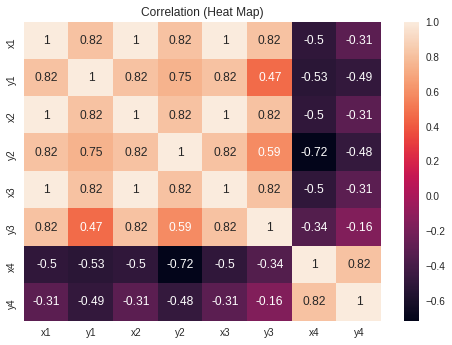

In [108]:
#Correlation 
for num in range(1,5):
  a,b = pearsonr(globals()["x{}".format(num)],globals()["y{}".format(num)])
  print("Correlation between x" + str(num),"and y" + str(num),"=", a )

ax = sns.heatmap(data.corr(),annot=True)
ax.set_title("Correlation (Heat Map)")

#Comment
We can observe that all sets of anscombe dataset have similar correlation, i.e 0.82

#Question 2b

Perform linear regression of Yi on Xi for each i=1,2,3,4 and comment on the
results

In [90]:
for num in range(1, 5):
  print("Linear Regression for y" + str(num),"and x" + str(num))
  print("Model"+str(num)+":" ,"y" + str(num), "= B0 + B"+str(num) + "x"+str(num) )
  globals()["x{}".format(num)]=sm.add_constant(globals()["x{}".format(num)])
  reg=sm.OLS(globals()["y{}".format(num)],globals()["x{}".format(num)]).fit()
  print(reg.summary())
  print('\n\n\n\n')

Linear Regression for y1 and x1
Model1: y1 = B0 + B1x1
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 29 Jul 2021   Prob (F-statistic):            0.00217
Time:                        16:29:14   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


#Comment
 
   
*   We can observe that **r-squared = 0.66** for all four linear models generated from anscombe's dataset, this implies x1,x2,x3,x4 explain 66% of variation in y1,y2,y3,y4 respectively.

*   We can also observe that p-value < 0.05 (LOS) for all model's significance test, so we can conclude by saying that B1,B2,B3,B4 are all statistically significant at 0.05 level of significance in their respective models.







